In [1]:
# data 시각화 라이브러리 import 하기
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Python 데이터 분석 패키지 Pandas 불러오기
import pandas as pd

# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

#### 데이터 불러오기

In [3]:
df = pd.read_csv('./data/event_log.csv')

# 상위 데이터 불러오기
# 원래는 세션을 따로 정의하고 만들어야 하지만, 해당 데이터셋에는 이미 만들어져 있다.
# 보통 각 페이지 뷰 간 30분 이상 차이날 때 새 세션으로 간주한다.
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


#### 일별 세션수 구하기

In [11]:
df['event_date'] = df['event_time'].str.slice(start=0, stop=10)
df['event_date_format'] = pd.to_datetime(df['event_date'], format="%Y-%m-%d")

df = df.loc[(df['event_date'] > '2020-09-30')]

In [12]:
# 날짜 별 unique user 수 계산하기
unique_user_and_session = (
                df.loc[:, ['user_id', 'user_session', 'event_time','event_date']].groupby('event_date').agg(['nunique', 'count'])
                )

In [13]:
# 계산된 데이터를 날짜순으로 정렬
unique_user_and_session.sort_values('event_date').head()

user_id       user_session       event_time      
           nunique count      nunique count    nunique count
event_date                                                  
2020-10-01    2699  4657         2847  4654       4500  4657
2020-10-02    2559  4555         2728  4554       4397  4555
2020-10-03    2162  3774         2271  3774       3666  3774
2020-10-04    2398  4413         2529  4413       4231  4413
2020-10-05    2832  4982         3002  4981       4790  4982

In [14]:
# ('user_id', 'nunique') : 유저 수
# ('user_session', 'nunique') : 세션 수
# ('event_time', 'count') : 이벤트 수 (클릭수)

agg = unique_user_and_session.sort_values('event_date')
user_session_df = pd.DataFrame(
    {
        'user_count': agg[('user_id', 'nunique')],
        'session_count': agg[('user_session', 'nunique')],
        'event_count': agg[(  'event_time',   'count')],
    }
)
user_session_df.head(5)

,user_count,session_count,event_count
event_date,,,
2020-10-01,2699,2847,4657
2020-10-02,2559,2728,4555
2020-10-03,2162,2271,3774
2020-10-04,2398,2529,4413
2020-10-05,2832,3002,4982


In [15]:
# 유저 별 일일 세션수
user_session_df['session_per_user'] = user_session_df['session_count'] / user_session_df['user_count']

# 세션 별 이벤트 클릭 수
user_session_df['clicks_per_session'] = user_session_df['event_count'] / user_session_df['session_count']

In [16]:
user_session_df.head()

,user_count,session_count,event_count,session_per_user,clicks_per_session
event_date,,,,,
2020-10-01,2699,2847,4657,1.054835,1.635757
2020-10-02,2559,2728,4555,1.066041,1.669721
2020-10-03,2162,2271,3774,1.050416,1.661823
2020-10-04,2398,2529,4413,1.054629,1.744958
2020-10-05,2832,3002,4982,1.060028,1.659560


In [18]:
# Wide to Long Format
# 하나의 데이터 프레임에 세로로 길게

melted_df = pd.melt(
          user_session_df.reset_index(), 
          id_vars=['event_date'], 
          value_vars=['session_per_user', 
                      'clicks_per_session']
)
melted_df.head()
melted_df.tail()

,event_date,variable,value
0,2020-10-01,session_per_user,1.054835
1,2020-10-02,session_per_user,1.066041
2,2020-10-03,session_per_user,1.050416
3,2020-10-04,session_per_user,1.054629
4,2020-10-05,session_per_user,1.060028


,event_date,variable,value
297,2021-02-24,clicks_per_session,1.785538
298,2021-02-25,clicks_per_session,1.814006
299,2021-02-26,clicks_per_session,1.794370
300,2021-02-27,clicks_per_session,1.733310
301,2021-02-28,clicks_per_session,1.724951


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, '유저별 1일 평균 방문수와 방문 대비 클릭수')

Text(0.5, 0, '일자')

Text(0, 0.5, 'variable')

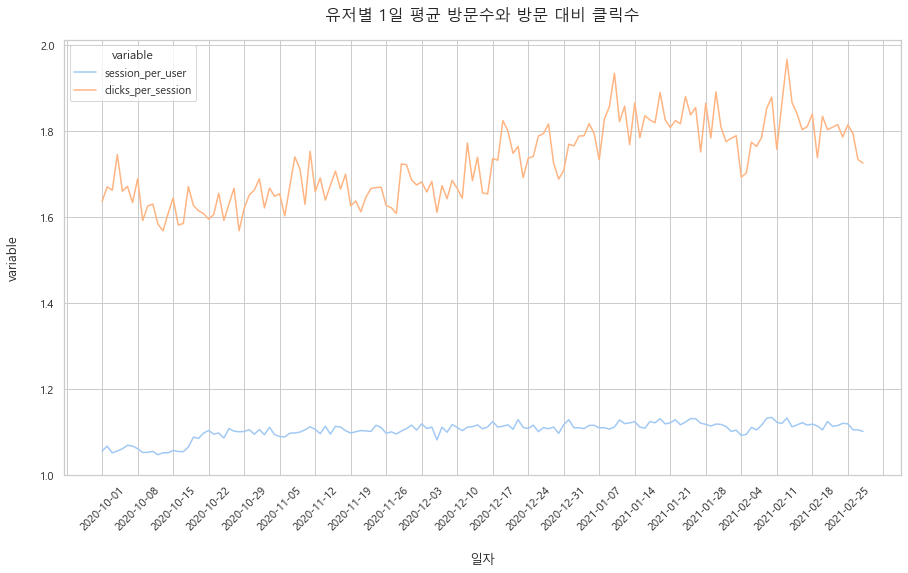

In [19]:
sns.set_theme(style="whitegrid", palette="pastel") # 테마를 설정한다
plt.rc('font', family='Malgun Gothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X 라벨의 글씨를 회전한다.

g = sns.lineplot(x='event_date', y='value', hue='variable', data=melted_df)# line 차트 그래프를 그린다
g.figure.set_size_inches(15, 8) # 그래프의 크기를 키운다
g.xaxis.set_major_locator(ticker.MultipleLocator(7)) # 축의 간격을 7배로 설정한다
g.set_title("유저별 1일 평균 방문수와 방문 대비 클릭수", pad=20, size=16) # pad 그래프와 제목 사이의 간격을 조정합니다.

g.set_xlabel("일자",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.
g.set_ylabel("variable",labelpad = 20, size = 13) # 라벨의 이름, 라벨과 축 사이의 간격, 폰트를 설정한다.